In [2]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
dataset=pd.read_csv("C:\\Users\\btlak\\Documents\\dataset\\Youtube-Spam-Dataset.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   VIDEO_NAME  1956 non-null   object
 5   CLASS       1956 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 91.8+ KB


In [5]:
dataset.isnull().sum()

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
VIDEO_NAME      0
CLASS           0
dtype: int64

In [7]:
dataset.head(2)

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1


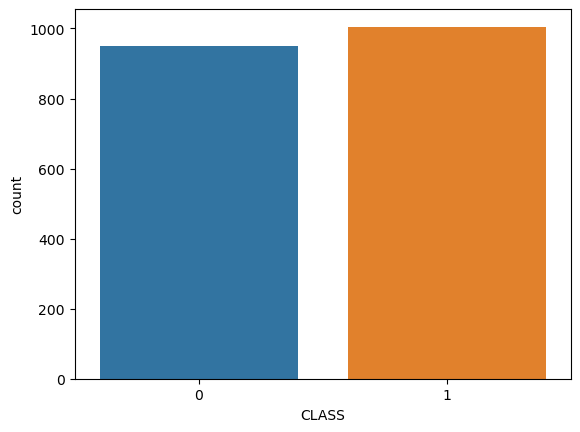

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='CLASS',data=dataset)
plt.show()

In [9]:
stemmer=PorterStemmer()
corpus=[]
for x in range(len(dataset['CONTENT'])):
    rev=re.sub('^[a-zA-Z]','',dataset['CONTENT'][x])
    rev=rev.lower().split()
    rev=[stemmer.stem(word) for word in rev if word not in stopwords.words('english')]
    rev=''.join(rev)
    corpus.append(rev)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=1500)
X_vect=vectorizer.fit_transform(corpus).toarray()
y=dataset['CLASS'].values
X_train,X_test,y_train,y_test=train_test_split(X_vect,y,test_size=0.8,random_state=42)

In [11]:
model=LogisticRegression(penalty='l1',solver='liblinear')
model

LogisticRegression(penalty='l1', solver='liblinear')

In [12]:
model.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [13]:
model.score(X_train,y_train),model.score(X_test,y_test)

(0.7340153452685422, 0.6856230031948882)